<a href="https://colab.research.google.com/github/Alvaro-afk-25/LotoNYRedNeuronal/blob/main/proyect1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

In [ ]:
url= "https://www.lotto.net/es/powerball/resultados/"
ano_ini=2010
ano_fin=2025
enlaces = [f"{url}{ano}" for ano in range(ano_ini,ano_fin+1)]


numbers = []

for enlace in enlaces:
  response = requests.get(enlace)
  soup = BeautifulSoup(response.content, 'html.parser')
  for element in soup.find_all(text= True):
    if element.isdigit():
      numbers.append(int(element))
  with open('numeros.json','w') as f:
    json.dump(numbers,f)

num_matrix=[]

for i in range(0, len(numbers), 7):
  num_matrix.append(numbers[i:i+7]);
for i in range(len(num_matrix)):
    while len(num_matrix[i]) > 5:
        num_matrix[i].pop();

print(num_matrix)

data=np.array(num_matrix)

tamano= len(num_matrix)

#print(tamano)
#NO USRA COL1 HAY UN ERROR
#col1= data[:,0]
print("umerors", col1.shape)

<ipython-input-54-55b523fef129>:12: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for element in soup.find_all(text= True):


[[3, 16, 18, 20, 37], [1, 17, 38, 50, 52], [11, 33, 44, 46, 47], [4, 11, 19, 33, 43], [10, 11, 18, 32, 45], [1, 8, 10, 19, 20], [8, 11, 25, 41, 58], [13, 24, 27, 31, 42], [5, 10, 11, 12, 20], [10, 30, 37, 47, 54], [8, 20, 21, 32, 37], [10, 12, 38, 53, 57], [14, 16, 53, 54, 59], [17, 30, 48, 51, 54], [5, 8, 11, 40, 44], [7, 12, 23, 34, 38], [34, 38, 39, 45, 50], [1, 7, 27, 36, 49], [20, 24, 25, 53, 59], [2, 7, 16, 20, 46], [7, 17, 20, 39, 59], [11, 12, 15, 16, 28], [12, 22, 32, 34, 46], [2, 6, 32, 42, 49], [14, 26, 37, 41, 46], [12, 20, 30, 36, 47], [13, 44, 51, 52, 55], [8, 16, 27, 35, 42], [10, 24, 36, 52, 55], [1, 18, 37, 39, 44], [7, 20, 21, 34, 43], [7, 17, 20, 36, 59], [10, 35, 39, 51, 57], [11, 14, 22, 33, 42], [17, 20, 21, 40, 51], [4, 22, 27, 32, 56], [16, 17, 29, 31, 36], [7, 10, 12, 22, 27], [4, 32, 33, 47, 55], [9, 33, 36, 50, 58], [7, 10, 22, 23, 52], [4, 22, 26, 31, 52], [19, 28, 30, 37, 53], [1, 16, 17, 41, 57], [1, 11, 20, 25, 27], [20, 30, 38, 46, 59], [16, 22, 30, 51, 

In [ ]:
from tensorflow.keras.layers import LeakyReLU, Dropout
#OTRO INTENTO CON OTRO MODELO
#Normaliza entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

scaler = MinMaxScaler(feature_range=(0,1))
col1_normalizado = scaler.fit_transform(num_matrix)
x=col1_normalizado[:-1]
y=col1_normalizado[1:]


model= Sequential()
model.add(Dense(128, input_dim=x.shape[1], kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(x.shape[1], activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# ENTRENAMIENTO
model.fit(x,y, epochs=100, batch_size=32, verbose=1)
print(model.summary())


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9913
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4185
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2009
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1137
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0749
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0582
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0453
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0429
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0438
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0417
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0420
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0416
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411
Epoch 15/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399
Epoc

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,049 (109.57 KB)

 Trainable params: 9,349 (36.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,700 (73.05 KB)

None


In [ ]:
ult_sorteo = col1_normalizado[-1].reshape(1,-1)
prox_soteo = model.predict(ult_sorteo)

prox_soteo_desnormalizado = scaler.inverse_transform(prox_soteo)
prox_soteo = np.round(prox_soteo_desnormalizado).astype(int)
print("perro funciona:", prox_soteo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
perro funciona: [[11 22 34 45 56]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(col1[:-1],col1[1:], test_size=0.33,random_state=42)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

model1.add(Dense(100, input_dim=1, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.compile(optimizer='Adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.fit(x_train,y_train, epochs=1000,batch_size=32, verbose=False)

In [ ]:
loss, accuracy = model1.evaluate(x_test,y_test, verbose=1)
print('Lost ', loss)
print ('Efecticidad ', accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 111.5258 - mae: 8.2862 
Lost  110.93738555908203
Efecticidad  8.317770957946777


Los números más comunes son:
2: 2955 veces
19: 2079 veces
59: 2064 veces
64: 1998 veces
7: 1998 veces
45: 1990 veces
53: 1987 veces
3: 1982 veces
6: 1948 veces
33: 1935 veces

Analizando la lista 1: [2, 6, 9, 33, 39]
  -  
  - Diferencias: [4, 3, 24, 6]
  - Ratios: [3.0, 1.5, 3.6666666666666665, 1.1818181818181819]
  - Seno: [0.9092974268256817, -0.27941549819892586, 0.4121184852417566, 0.9999118601072672, 0.9637953862840878]
  - Coseno: [-0.4161468365471424, 0.960170286650366, -0.9111302618846769, -0.013276747223059479, 0.26664293235993725]
  - Logaritmo: [0.6931471805599453, 1.791759469228055, 2.1972245773362196, 3.4965075614664802, 3.6635616461296463]
  - Factores: [[2], [2, 3], [3, 3], [3, 11], [3, 13]]


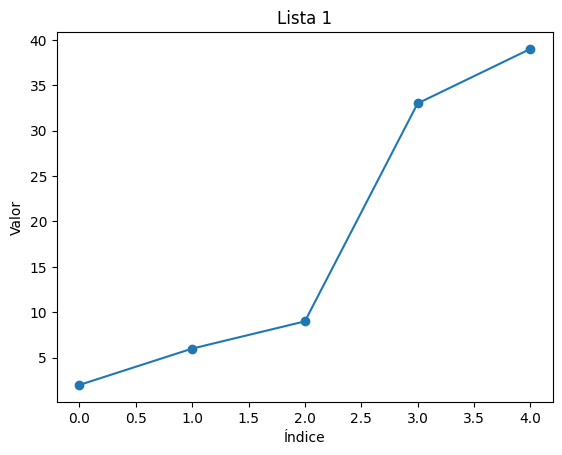


Analizando la lista 2: [36, 38, 45, 62, 64]
  -  
  - Diferencias: [2, 7, 17, 2]
  - Ratios: [1.0555555555555556, 1.1842105263157894, 1.3777777777777778, 1.032258064516129]
  - Seno: [-0.9917788534431158, 0.2963685787093853, 0.8509035245341184, -0.7391806966492228, 0.9200260381967906]
  - Coseno: [-0.12796368962740468, 0.9550736440472949, 0.5253219888177297, 0.6735071623235862, 0.39185723042955]
  - Logaritmo: [3.58351893845611, 3.6375861597263857, 3.8066624897703196, 4.127134385045092, 4.1588830833596715]
  - Factores: [[2, 2, 3, 3], [2, 19], [3, 3, 5], [2, 31], [2, 2, 2, 2, 2, 2]]


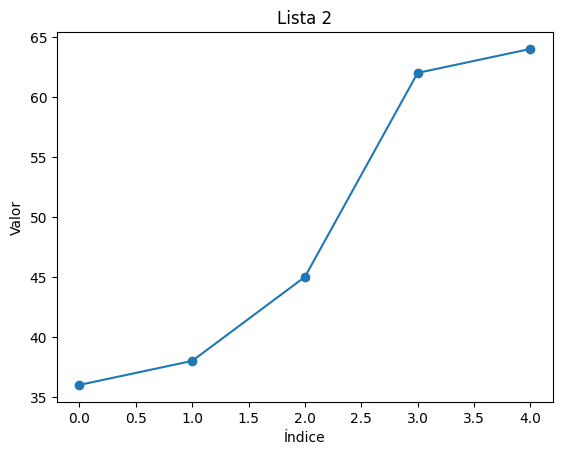


Analizando la lista 3: [27, 29, 45, 55, 58]
  -  
  - Diferencias: [2, 16, 10, 3]
  - Ratios: [1.0740740740740742, 1.5517241379310345, 1.2222222222222223, 1.0545454545454545]
  - Seno: [0.956375928404503, -0.6636338842129675, 0.8509035245341184, -0.9997551733586199, 0.9928726480845371]
  - Coseno: [-0.2921388087338362, -0.7480575296890003, 0.5253219888177297, 0.022126756261955736, 0.11918013544881928]
  - Logaritmo: [3.295836866004329, 3.367295829986474, 3.8066624897703196, 4.007333185232471, 4.060443010546419]
  - Factores: [[3, 3, 3], [29], [3, 3, 5], [5, 11], [2, 29]]


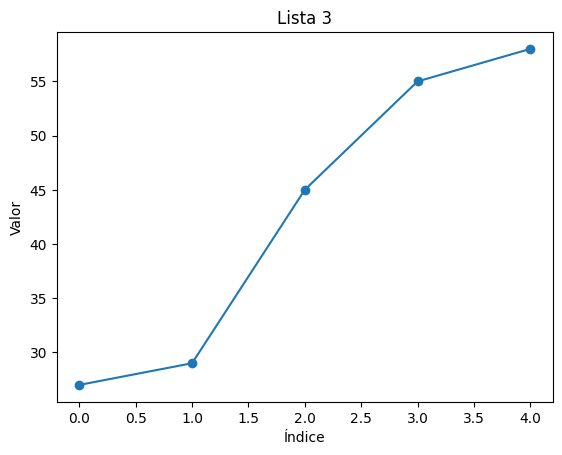


Analizando la lista 4: [7, 16, 19, 48, 68]
  -  
  - Diferencias: [9, 3, 29, 20]
  - Ratios: [2.2857142857142856, 1.1875, 2.526315789473684, 1.4166666666666667]
  - Seno: [0.6569865987187891, -0.2879033166650653, 0.14987720966295234, -0.7682546613236668, -0.8979276806892913]
  - Coseno: [0.7539022543433046, -0.9576594803233847, 0.9887046181866692, -0.6401443394691997, 0.4401430224960407]
  - Logaritmo: [1.9459101490553132, 2.772588722239781, 2.9444389791664403, 3.871201010907891, 4.219507705176107]
  - Factores: [[7], [2, 2, 2, 2], [19], [2, 2, 2, 2, 3], [2, 2, 17]]


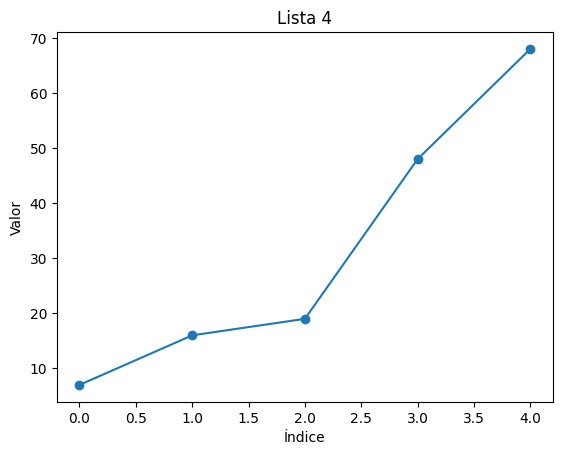


Analizando la lista 5: [2, 13, 23, 34, 66]
  -  
  - Diferencias: [11, 10, 11, 32]
  - Ratios: [6.5, 1.7692307692307692, 1.4782608695652173, 1.9411764705882353]
  - Seno: [0.9092974268256817, 0.4201670368266409, -0.8462204041751706, 0.5290826861200238, -0.026551154023966794]
  - Coseno: [-0.4161468365471424, 0.9074467814501962, -0.5328330203333975, -0.8485702747846052, -0.99964745596635]
  - Logaritmo: [0.6931471805599453, 2.5649493574615367, 3.1354942159291497, 3.5263605246161616, 4.189654742026425]
  - Factores: [[2], [13], [23], [2, 17], [2, 3, 11]]


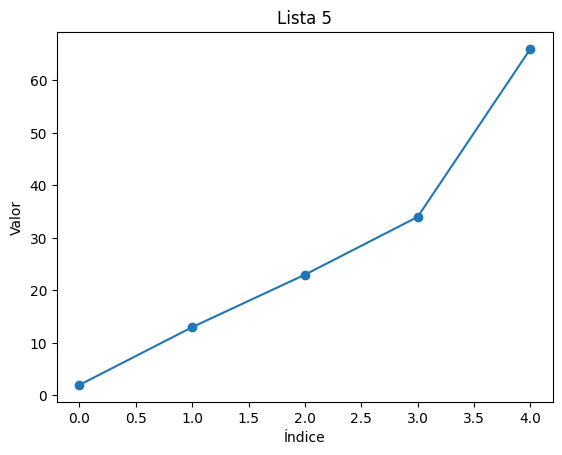


Analizando la lista 6: [2, 6, 24, 51, 61]
  -  
  - Diferencias: [4, 18, 27, 10]
  - Ratios: [3.0, 4.0, 2.125, 1.196078431372549]
  - Seno: [0.9092974268256817, -0.27941549819892586, -0.9055783620066239, 0.6702291758433747, -0.9661177700083929]
  - Coseno: [-0.4161468365471424, 0.960170286650366, 0.424179007336997, 0.7421541968137826, -0.25810163593826746]
  - Logaritmo: [0.6931471805599453, 1.791759469228055, 3.1780538303479458, 3.9318256327243257, 4.110873864173311]
  - Factores: [[2], [2, 3], [2, 2, 2, 3], [3, 17], [61]]


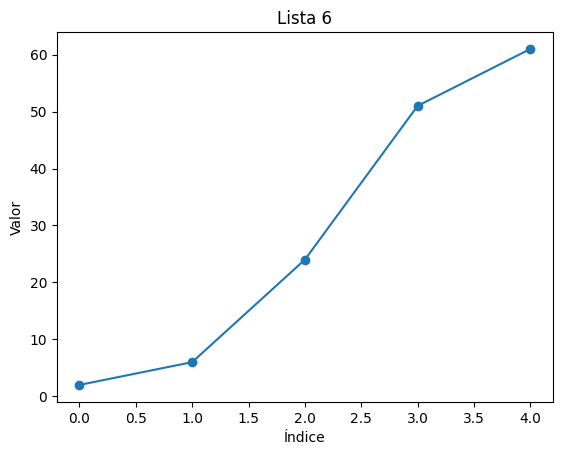


Analizando la lista 7: [19, 20, 40, 42, 59]
  -  
  - Diferencias: [1, 20, 2, 17]
  - Ratios: [1.0526315789473684, 2.0, 1.05, 1.4047619047619047]
  - Seno: [0.14987720966295234, 0.9129452507276277, 0.7451131604793488, -0.9165215479156338, 0.6367380071391379]
  - Coseno: [0.9887046181866692, 0.40808206181339196, -0.6669380616522619, -0.39998531498835127, -0.7710802229758452]
  - Logaritmo: [2.9444389791664403, 2.995732273553991, 3.6888794541139363, 3.7376696182833684, 4.07753744390572]
  - Factores: [[19], [2, 2, 5], [2, 2, 2, 5], [2, 3, 7], [59]]


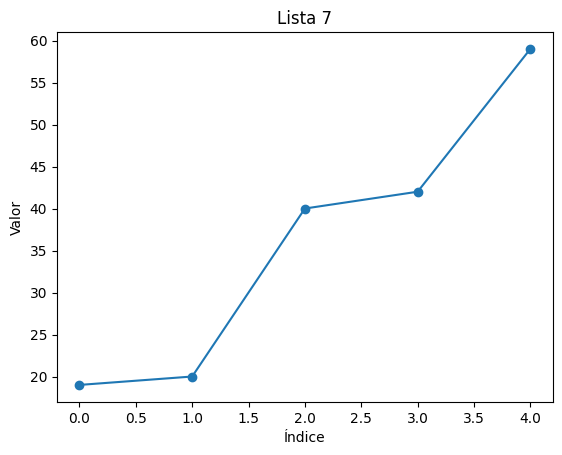


Analizando la lista 8: [10, 30, 37, 53, 59]
  -  
  - Diferencias: [20, 7, 16, 6]
  - Ratios: [3.0, 1.2333333333333334, 1.4324324324324325, 1.1132075471698113]
  - Seno: [-0.5440211108893698, -0.9880316240928618, -0.6435381333569995, 0.39592515018183416, 0.6367380071391379]
  - Coseno: [-0.8390715290764524, 0.15425144988758405, 0.7654140519453434, -0.9182827862121189, -0.7710802229758452]
  - Logaritmo: [2.302585092994046, 3.4011973816621555, 3.6109179126442243, 3.970291913552122, 4.07753744390572]
  - Factores: [[2, 5], [2, 3, 5], [37], [53], [59]]


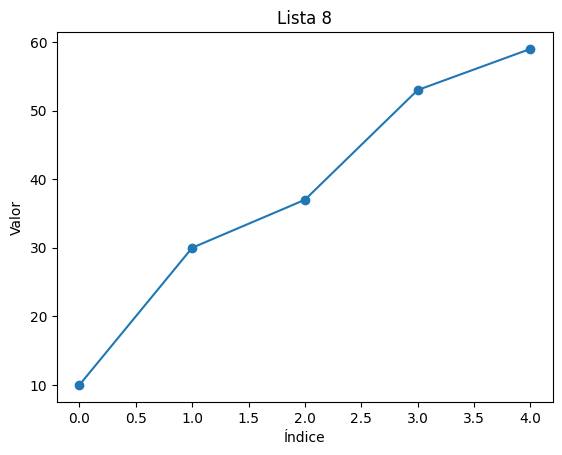


Analizando la lista 9: [3, 25, 44, 53, 64]
  -  
  - Diferencias: [22, 19, 9, 11]
  - Ratios: [8.333333333333334, 1.76, 1.2045454545454546, 1.2075471698113207]
  - Seno: [0.1411200080598672, -0.13235175009777303, 0.017701925105413577, 0.39592515018183416, 0.9200260381967906]
  - Coseno: [-0.9899924966004454, 0.9912028118634736, 0.9998433086476912, -0.9182827862121189, 0.39185723042955]
  - Logaritmo: [1.0986122886681098, 3.2188758248682006, 3.784189633918261, 3.970291913552122, 4.1588830833596715]
  - Factores: [[3], [5, 5], [2, 2, 11], [53], [2, 2, 2, 2, 2, 2]]


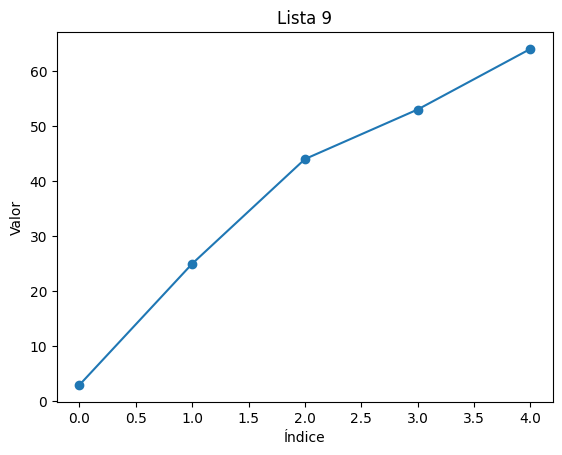


Analizando la lista 10: [3, 7, 33, 50, 69]
  -  
  - Diferencias: [4, 26, 17, 19]
  - Ratios: [2.3333333333333335, 4.714285714285714, 1.5151515151515151, 1.38]
  - Seno: [0.1411200080598672, 0.6569865987187891, 0.9999118601072672, -0.26237485370392877, -0.11478481378318722]
  - Coseno: [-0.9899924966004454, 0.7539022543433046, -0.013276747223059479, 0.9649660284921133, 0.9933903797222716]
  - Logaritmo: [1.0986122886681098, 1.9459101490553132, 3.4965075614664802, 3.912023005428146, 4.23410650459726]
  - Factores: [[3], [7], [3, 11], [2, 5, 5], [3, 23]]


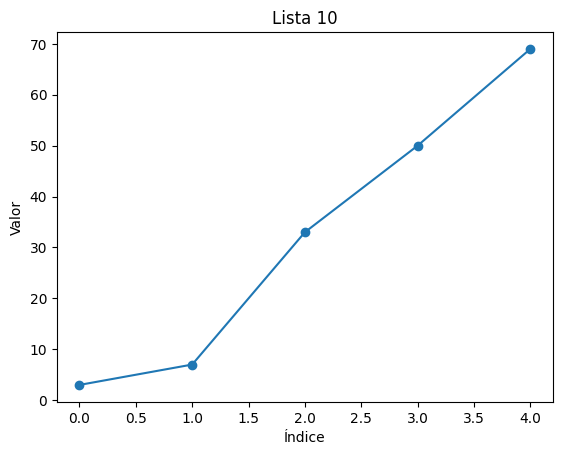

In [5]:
listas_numeros = [

    [2, 6, 9, 33, 39], [36, 38, 45, 62, 64], [27, 29, 45, 55, 58], [7, 16, 19, 48, 68], [2, 13, 23, 34, 66], [2, 6, 24, 51, 61], [19, 20, 40, 42, 59], [10, 30, 37, 53, 59], [3, 25, 44, 53, 64], [3, 7, 33, 50, 69], [3, 21, 38, 50, 59], [10, 40, 45, 56, 67], [12, 15, 38, 57, 63], [18, 26, 28, 38, 47], [8, 32, 55, 64, 66], [10, 16, 32, 63, 65], [7, 20, 29, 38, 67], [40, 43, 48, 59, 69], [3, 16, 48, 52, 60], [5, 31, 34, 51, 53], [8, 15, 26, 35, 45], [19, 25, 43, 46, 48], [21, 46, 47, 57, 62], [8, 30, 48, 57, 64], [1, 2, 24, 50, 57], [9, 25, 34, 44, 45], [5, 23, 28, 43, 56], [3, 6, 26, 35, 51], [10, 27, 29, 44, 58], [10, 30, 51, 57, 63], [7, 29, 36, 41, 43], [30, 32, 48, 53, 63], [30, 31, 41, 42, 48], [23, 29, 47, 59, 60], [11, 20, 33, 39, 65], [12, 17, 30, 45, 62], [1, 17, 52, 58, 64], [12, 22, 54, 66, 69], [28, 38, 42, 47, 52], [2, 7, 11, 17, 32], [21, 22, 39, 44, 60], [22, 23, 37, 62, 63], [20, 40, 47, 55, 63], [37, 51, 54, 58, 60], [5, 36, 39, 45, 57], [1, 4, 18, 46, 62], [37, 40, 50, 61, 63], [20, 31, 38, 40, 49], [9, 22, 41, 47, 61], [11, 20, 22, 33, 54], [32, 35, 40, 52, 54], [10, 20, 29, 48, 51], [3, 15, 45, 51, 61], [12, 22, 26, 46, 59], [27, 39, 54, 56, 59], [17, 36, 47, 60, 61], [16, 28, 36, 39, 59], [35, 36, 51, 55, 61], [6, 21, 49, 65, 67], [12, 18, 20, 29, 30], [7, 24, 36, 54, 60], [5, 21, 32, 36, 58], [1, 21, 22, 34, 47], [25, 30, 53, 59, 60], [1, 4, 11, 59, 67], [27, 28, 44, 67, 68], [15, 22, 38, 54, 66], [33, 46, 52, 59, 62], [1, 5, 29, 54, 62], [8, 21, 30, 49, 57], [26, 40, 41, 55, 65], [24, 29, 50, 65, 66], [8, 31, 39, 43, 60], [13, 20, 40, 51, 63], [4, 22, 35, 38, 39], [19, 29, 34, 44, 50], [8, 25, 34, 38, 41], [19, 28, 46, 50, 54], [44, 52, 54, 64, 69], [6, 7, 11, 66, 67], [11, 13, 22, 27, 46], [2, 8, 21, 34, 62], [3, 19, 27, 37, 40], [11, 13, 55, 56, 69], [4, 10, 37, 39, 69], [1, 19, 20, 38, 54], [12, 17, 20, 21, 26], [16, 23, 28, 40, 63], [35, 36, 47, 61, 63], [16, 18, 35, 39, 53], [22, 36, 48, 59, 61], [21, 25, 32, 63, 67], [10, 21, 26, 41, 49], [13, 30, 33, 45, 61], [14, 16, 23, 50, 53], [27, 35, 39, 51, 66], [1, 12, 17, 39, 53], [3, 10, 44, 55, 68], [6, 14, 38, 39, 65], [4, 9, 17, 27, 38], [1, 6, 22, 42, 61], [34, 38, 42, 61, 62], [5, 11, 51, 56, 61], [17, 18, 37, 44, 53], [11, 31, 50, 52, 58], [21, 40, 44, 50, 55], [2, 28, 31, 44, 52], [4, 33, 43, 53, 65], [4, 8, 22, 32, 58], [1, 15, 21, 32, 46], [20, 28, 33, 63, 68], [15, 39, 58, 63, 67], [1, 16, 48, 49, 65], [5, 37, 40, 64, 66], [1, 2, 7, 52, 61], [17, 33, 35, 42, 52], [5, 8, 17, 27, 28], [40, 53, 60, 68, 69], [14, 20, 39, 65, 67], [4, 19, 23, 25, 49], [14, 26, 38, 45, 46], [1, 20, 22, 60, 66], [3, 4, 11, 41, 67], [2, 6, 9, 33, 39], [36, 38, 45, 62, 64], [27, 29, 45, 55, 58], [7, 16, 19, 48, 68], [2, 13, 23, 34, 66], [2, 6, 24, 51, 61], [19, 20, 40, 42, 59], [10, 30, 37, 53, 59], [3, 25, 44, 53, 64], [3, 7, 33, 50, 69], [3, 21, 38, 50, 59], [10, 40, 45, 56, 67], [12, 15, 38, 57, 63], [18, 26, 28, 38, 47], [8, 32, 55, 64, 66], [10, 16, 32, 63, 65], [7, 20, 29, 38, 67], [40, 43, 48, 59, 69], [3, 16, 48, 52, 60], [5, 31, 34, 51, 53], [8, 15, 26, 35, 45], [19, 25, 43, 46, 48], [21, 46, 47, 57, 62], [8, 30, 48, 57, 64], [1, 2, 24, 50, 57], [9, 25, 34, 44, 45], [5, 23, 28, 43, 56], [3, 6, 26, 35, 51], [10, 27, 29, 44, 58], [10, 30, 51, 57, 63], [7, 29, 36, 41, 43], [30, 32, 48, 53, 63], [30, 31, 41, 42, 48], [23, 29, 47, 59, 60], [11, 20, 33, 39, 65], [12, 17, 30, 45, 62], [1, 17, 52, 58, 64], [12, 22, 54, 66, 69], [28, 38, 42, 47, 52], [2, 7, 11, 17, 32], [21, 22, 39, 44, 60], [22, 23, 37, 62, 63], [20, 40, 47, 55, 63], [37, 51, 54, 58, 60], [5, 36, 39, 45, 57], [1, 4, 18, 46, 62], [37, 40, 50, 61, 63], [20, 31, 38, 40, 49], [9, 22, 41, 47, 61], [11, 20, 22, 33, 54], [32, 35, 40, 52, 54], [10, 20, 29, 48, 51], [3, 15, 45, 51, 61], [12, 22, 26, 46, 59], [27, 39, 54, 56, 59], [17, 36, 47, 60, 61], [16, 28, 36, 39, 59], [35, 36, 51, 55, 61], [6, 21, 49, 65, 67], [12, 18, 20, 29, 30], [7, 24, 36, 54, 60], [5, 21, 32, 36, 58], [1, 21, 22, 34, 47], [25, 30, 53, 59, 60], [1, 4, 11, 59, 67], [27, 28, 44, 67, 68], [15, 22, 38, 54, 66], [33, 46, 52, 59, 62], [1, 5, 29, 54, 62], [8, 21, 30, 49, 57], [26, 40, 41, 55, 65], [24, 29, 50, 65, 66], [8, 31, 39, 43, 60], [13, 20, 40, 51, 63], [4, 22, 35, 38, 39], [19, 29, 34, 44, 50], [8, 25, 34, 38, 41], [19, 28, 46, 50, 54], [44, 52, 54, 64, 69], [6, 7, 11, 66, 67], [11, 13, 22, 27, 46], [2, 8, 21, 34, 62], [3, 19, 27, 37, 40], [11, 13, 55, 56, 69], [4, 10, 37, 39, 69], [1, 19, 20, 38, 54], [12, 17, 20, 21, 26], [16, 23, 28, 40, 63], [35, 36, 47, 61, 63], [16, 18, 35, 39, 53], [22, 36, 48, 59, 61], [21, 25, 32, 63, 67], [10, 21, 26, 41, 49], [13, 30, 33, 45, 61], [14, 16, 23, 50, 53], [27, 35, 39, 51, 66], [1, 12, 17, 39, 53], [3, 10, 44, 55, 68], [6, 14, 38, 39, 65], [4, 9, 17, 27, 38], [1, 6, 22, 42, 61], [34, 38, 42, 61, 62], [5, 11, 51, 56, 61], [17, 18, 37, 44, 53], [11, 31, 50, 52, 58], [21, 40, 44, 50, 55], [2, 28, 31, 44, 52], [4, 33, 43, 53, 65], [4, 8, 22, 32, 58], [1, 15, 21, 32, 46], [20, 28, 33, 63, 68], [15, 39, 58, 63, 67], [1, 16, 48, 49, 65], [5, 37, 40, 64, 66], [1, 2, 7, 52, 61], [17, 33, 35, 42, 52], [5, 8, 17, 27, 28], [40, 53, 60, 68, 69], [14, 20, 39, 65, 67], [4, 19, 23, 25, 49], [14, 26, 38, 45, 46], [1, 20, 22, 60, 66], [3, 4, 11, 41, 67],

     [18, 37, 44, 50, 64],
     [26, 32, 38, 45, 56],
     [17, 41, 47, 60, 61],
     [17, 37, 46, 54, 67], [12, 15, 24, 34, 59],
      [7, 37, 55, 65, 67],
      [33, 56, 64, 66, 68],
       [36, 51, 59, 66, 68],
       [16, 31, 50, 55, 61],
        [9, 23, 47, 49, 68],
         [6, 28, 44, 59, 61],
          [35, 45, 47, 54, 55],
           [6, 13, 33, 36, 37],
            [4, 19, 24, 47, 66],
             [29, 30, 32, 48, 50],
              [15, 30, 47, 50, 51],
               [1, 2, 31, 39, 66],
                [1, 6, 40, 51, 67],
                [7, 28, 62, 63, 64],
                [28, 34, 51, 53, 56],
                 [19, 35, 53, 54, 67],
                  [16, 20, 44, 57, 58],
                  [7, 14, 24, 30, 56],
                  [10, 33, 41, 47, 56],
                  [28, 45, 53, 56, 69], [2, 11, 22, 35, 60], [13, 19, 36, 39, 59], [19, 31, 40, 46, 57], [19, 36, 37, 46, 56], [18, 23, 35, 45, 54], [19, 25, 48, 55, 60], [6, 8, 15, 27, 42], [19, 30, 36, 46, 60], [32, 37, 40, 58, 62], [14, 30, 41, 42, 59], [3, 6, 11, 17, 22], [13, 43, 53, 60, 68], [26, 30, 33, 37, 62], [2, 16, 22, 55, 63], [8, 21, 22, 65, 69], [6, 10, 24, 33, 67], [13, 20, 31, 33, 59], [3, 9, 21, 24, 29], [6, 33, 34, 45, 54], [7, 15, 36, 46, 67], [5, 25, 36, 51, 61], [9, 10, 20, 22, 52], [6, 14, 16, 34, 66], [38, 42, 56, 68, 69], [3, 16, 30, 33, 36], [4, 7, 32, 55, 64], [18, 27, 49, 65, 69], [7, 8, 19, 24, 28], [13, 36, 43, 61, 69], [2, 18, 56, 60, 65], [6, 24, 35, 37, 44], [12, 27, 34, 55, 67], [5, 9, 11, 16, 66], [23, 28, 41, 50, 55], [20, 24, 47, 50, 63], [19, 24, 35, 43, 62], [29, 44, 59, 61, 68], [32, 45, 51, 57, 58], [8, 15, 46, 56, 68], [9, 21, 56, 57, 66], [15, 21, 31, 36, 65], [4, 17, 57, 58, 68], [1, 25, 44, 55, 57], [25, 37, 38, 39, 65], [39, 41, 54, 59, 62], [10, 20, 23, 49, 65], [14, 34, 36, 50, 58], [3, 18, 23, 32, 57], [22, 23, 36, 47, 63], [4, 26, 34, 37, 52], [14, 22, 42, 46, 52], [32, 36, 49, 62, 69], [15, 16, 24, 31, 56], [9, 10, 37, 59, 62], [8, 40, 49, 58, 63], [11, 13, 18, 30, 37], [6, 12, 20, 27, 32], [6, 10, 31, 48, 56], [3, 44, 61, 63, 69], [10, 19, 40, 45, 58], [19, 28, 41, 42, 51], [2, 27, 42, 44, 51], [18, 20, 26, 53, 69], [22, 39, 43, 62, 64], [2, 10, 35, 44, 46], [14, 16, 36, 52, 60], [11, 41, 56, 57, 63], [27, 28, 51, 68, 69], [2, 39, 50, 61, 66], [19, 28, 39, 42, 57], [1, 33, 37, 39, 42], [14, 15, 25, 52, 58], [40, 41, 58, 64, 65], [7, 15, 22, 36, 64], [6, 40, 41, 45, 52], [5, 7, 61, 63, 69], [18, 30, 35, 52, 56], [4, 5, 6, 28, 67], [37, 39, 55, 63, 69], [18, 27, 33, 39, 44], [14, 21, 37, 44, 63], [11, 36, 61, 62, 68], [12, 18, 20, 39, 61], [10, 39, 47, 49, 56], [20, 30, 45, 55, 56], [8, 33, 55, 59, 62], [15, 21, 32, 62, 65], [14, 16, 41, 63, 68], [5, 7, 24, 31, 34], [6, 16, 31, 62, 66], [6, 42, 45, 47, 64], [2, 32, 39, 46, 69], [6, 28, 47, 58, 59], [3, 7, 21, 31, 37], [11, 18, 39, 58, 62], [2, 10, 50, 59, 61], [31, 32, 37, 38, 48], [1, 15, 26, 63, 65], [8, 9, 18, 48, 52], [3, 28, 34, 35, 58], [21, 28, 32, 44, 49], [19, 20, 37, 39, 61], [13, 22, 34, 51, 67], [10, 43, 55, 59, 67], [8, 23, 37, 52, 63], [19, 37, 48, 61, 63], [7, 21, 39, 47, 55], [15, 32, 36, 48, 64], [6, 17, 21, 35, 64], [2, 36, 37, 45, 69], [3, 10, 15, 33, 42], [22, 30, 40, 42, 48], [16, 25, 27, 49, 55], [8, 10, 21, 41, 62], [2, 17, 33, 51, 63], [5, 15, 38, 47, 65], [5, 16, 27, 39, 61], [18, 29, 33, 62, 63], [10, 15, 51, 61, 69], [2, 15, 38, 54, 65], [4, 11, 38, 49, 69], [11, 29, 30, 47, 53], [8, 14, 33, 36, 67], [11, 15, 43, 55, 61], [9, 24, 35, 46, 65], [3, 18, 37, 51, 59], [12, 21, 22, 30, 33], [14, 17, 18, 21, 27], [20, 21, 36, 60, 65], [6, 14, 25, 33, 46], [2, 13, 32, 33, 48],
     [6, 12, 39, 48, 50],
 [7,9,12,31,62],
    [12,32,56,67,68],
    [35,36,44,45,67],
    [18,43,48,60,59],
    [4,8,46,47,48],
    [24,26,39,47,57],
    [4,14,33,39,61],
    [6,15,22,42,47],
    [5,14,19,46,64],
    [12,31,47,58,60],
    [9,17,20,38,40],
    [2,18,23,27,47],
    [1,4,12,36,49],
    [31,43,58,59,66],
    [2,8,15,19,58],
    [5,11,22,23,69],
    [52,58,59,64,66],
    [10,23,30,54,65],
    [17,26,37,61,65],
    [31,32,54,60,63],
    [8,21,31,32,37],
    [3,17,26,38,54],
    [11,19,39,44,65],
    [11,24,58,66,67],
    [16,28,49,51,55],
    [2,9,28,36,53],
    [10,16,18,40,66],
    [2,13,29,58,69],
    [26,27,43,61,69],
    [11,20,33,43,61]

]
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Tu lista de números
listas_numeros = [
    [2, 6, 9, 33, 39], [36, 38, 45, 62, 64], [27, 29, 45, 55, 58], [7, 16, 19, 48, 68],
    [2, 13, 23, 34, 66], [2, 6, 24, 51, 61], [19, 20, 40, 42, 59], [10, 30, 37, 53, 59],
    [3, 25, 44, 53, 64], [3, 7, 33, 50, 69]
]

# Función para simular la lotería utilizando la técnica de Monte Carlo
def simular_loteria(listas_numeros, simulaciones):
    frecuencia_numeros = {}

    for _ in range(simulaciones):
        # Elegir una lista aleatoria de las proporcionadas
        combinacion = random.choice(listas_numeros)

        for numero in combinacion:
            if 1 <= numero <= 79:
                if numero in frecuencia_numeros:
                    frecuencia_numeros[numero] += 1
                else:
                    frecuencia_numeros[numero] = 1

    # Ordenar los números por frecuencia
    numeros_ordenados = sorted(frecuencia_numeros.items(), key=lambda x: x[1], reverse=True)

    return numeros_ordenados

# Función para calcular si una lista sigue una serie aritmética
def es_aritmetica(lista):
    diffs = [j - i for i, j in zip(lista[:-1], lista[1:])]
    return all(diff == diffs[0] for diff in diffs)

# Función para calcular si una lista sigue una serie geométrica
def es_geometrica(lista):
    ratios = [j / i for i, j in zip(lista[:-1], lista[1:]) if i != 0]
    return all(ratio == ratios[0] for ratio in ratios)

# Función para calcular si una lista sigue la sucesión de Fibonacci
def es_fibonacci(lista):
    for i in range(2, len(lista)):
        if lista[i] != lista[i-1] + lista[i-2]:
            return False
    return True

# Función para calcular si una lista sigue una progresión cuadrática
def es_cuadratica(lista):
    diffs = [j - i for i, j in zip(lista[:-1], lista[1:])]
    second_diffs = [j - i for i, j in zip(diffs[:-1], diffs[1:])]
    return all(diff == second_diffs[0] for diff in second_diffs)

# Función para calcular si una lista sigue una progresión cúbica
def es_cubica(lista):
    diffs = [j - i for i, j in zip(lista[:-1], lista[1:])]
    second_diffs = [j - i for i, j in zip(diffs[:-1], diffs[1:])]
    third_diffs = [j - i for i, j in zip(second_diffs[:-1], second_diffs[1:])]
    return all(diff == third_diffs[0] for diff in third_diffs)

# Método del Producto Medio para generar números aleatorios
def producto_medio(seed1, seed2, iterations):
    results = []
    for _ in range(iterations):
        product = seed1 * seed2
        product_str = str(product).zfill(8)  # Asegura que el producto tenga al menos 8 dígitos
        mid_digits = int(product_str[2:6])  # Toma los dígitos del medio
        results.append(mid_digits)
        seed1, seed2 = seed2, mid_digits  # Actualiza las semillas
    return results

# Función para analizar diferencias y ratios
def analizar_diferencias_ratios(lista):
    diffs = [j - i for i, j in zip(lista[:-1], lista[1:])]
    ratios = [j / i for i, j in zip(lista[:-1], lista[1:]) if i != 0]
    return diffs, ratios

# Función para analizar funciones matemáticas (seno, coseno, logaritmo)
def analizar_funciones(lista):
    seno = [math.sin(x) for x in lista]
    coseno = [math.cos(x) for x in lista]
    logaritmo = [math.log(x) if x > 0 else None for x in lista]
    return seno, coseno, logaritmo

# Función para factorizar un número
def factorizar(n):
    i = 2
    factores = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factores.append(i)
    if n > 1:
        factores.append(n)
    return factores

# Función para graficar datos
def graficar_datos(lista, titulo):
    plt.plot(lista, marker='o')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.title(titulo)
    plt.show()

# Número de simulaciones de Monte Carlo
simulaciones = 10000

# Ejecutar la simulación
resultados = simular_loteria(listas_numeros, simulaciones)

# Mostrar los números más comunes
print("Los números más comunes son:")
for numero, frecuencia in resultados[:10]:  # Mostramos los 10 números más comunes
    print(f"{numero}: {frecuencia} veces")

# Analizar cada lista de números
for i, lista in enumerate(listas_numeros):
    print(f"\nAnalizando la lista {i + 1}: {lista}")

    # Verificar series matemáticas
    if es_aritmetica(lista):
        #print("  - Sigue una serie aritmética")
        print("  -  ")
    if es_geometrica(lista):
        print("  - Sigue una serie geométrica")
    if es_fibonacci(lista):
        print("  - Sigue la sucesión de Fibonacci")
    if es_cuadratica(lista):
        print("  - Sigue una progresión cuadrática")
    if es_cubica(lista):
        print("  - Sigue una progresión cúbica")
    if not (es_aritmetica(lista) or es_geometrica(lista) or es_fibonacci(lista) or es_cuadratica(lista) or es_cubica(lista)):
        #print("  - No sigue ninguna serie conocida")
        print("  -  ")

    # Calcular diferencias y ratios
    diferencias, ratios = analizar_diferencias_ratios(lista)
    print("  - Diferencias:", diferencias)
    print("  - Ratios:", ratios)

    # Analizar funciones matemáticas
    seno, coseno, logaritmo = analizar_funciones(lista)
    print("  - Seno:", seno)
    print("  - Coseno:", coseno)
    print("  - Logaritmo:", logaritmo)

    # Factorizar números
    factores_lista = [factorizar(num) for num in lista]
    print("  - Factores:", factores_lista)

    # Graficar datos
    graficar_datos(lista, f"Lista {i + 1}")

# Generar números aleatorios utilizando el método del Producto Medio
seed1 = 1234
seed2 = 5678
iterations = 10
random_numbers = producto_medio(seed1, seed2, iterations)
#print(f"\nNúmeros aleatorios generados por el método del Producto Medio: {random_numbers}")


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(data[:-1],data[1:], test_size=1,random_state=42)




In [ ]:

model = Sequential()

model.add(Dense(400, input_dim=5, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(5, activation='relu'))
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])



In [ ]:
model.fit(x_train,y_train, epochs=5000,batch_size=32, verbose=False)

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=1)
print('Lost ', loss)
print ('Efecticidad ', accuracy)


1/1 [==============================] - 0s 193ms/step - loss: 23.8247 - mae: 3.8937
Lost  23.82472801208496
Efecticidad  3.893747329711914


In [ ]:
data1 = [
    3,15,20,23,46]
next_numbers= model.predict(np.array([data1]))

print(next_numbers)

1/1 [==============================] - 0s 133ms/step
[[12.508028 25.539322 38.98282  44.895653 46.74239 ]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
x_train=np.array(listas_numeros)
y_train=np.array(listas_numeros)


In [ ]:
model = Sequential()
model.add(LSTM(10,input_shape=(5,1)))
model.add(Dense(5, 'relu'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.fit(x_train, y_train, epochs=2000, verbose=False)

In [ ]:
x_test=np.array(listas_numeros)
y_pred=model.predict(x_test)
print("Prediccion ")
print(y_pred)

14/14 [==============================] - 0s 2ms/step
Prediccion 
[[0.         0.6407732  0.         0.         0.16337025]
 [0.         0.5909584  0.         0.20481437 0.        ]
 [0.         0.58191127 0.         0.19241682 0.        ]
 ...
 [0.         0.66561794 0.         0.10981178 0.07914121]
 [0.         0.6014943  0.         0.20588979 0.        ]
 [0.         0.62569463 0.         0.14187312 0.0258785 ]]


1000 ////
15.260287 30.277819 41.210598 50.768463 57.46023 ///
1100 ///
35.381985 39.832138 44.24911  53.618332 55.054546 ///
1200 ////
---13.358925 29.810976 38.85522  46.83721  51.7011  
\\\\\2000\\\\9.505372 19.099854 35.402397 49.75504  60.589153\\\

